# Data Mining with PCA and KMeans

Addendum: Real-World Example with Cereal Dataset
Dataset Overview:
The cereal dataset contains nutritional information about various cereal brands. The columns include name, manufacturer, type, calories, protein, fat, sodium, fiber, carbohydrates, sugars, potassium, vitamins, shelf location, weight, cups, and rating.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [10]:
import pandas as pd

# Load the CSV file
file_path = 'https://raw.githubusercontent.com/fenago/datasets/main/cereal.csv'
cereal_df = pd.read_csv(file_path)

# Display the columns of the dataframe
cereal_df.columns.tolist()

['name',
 'mfr',
 'type',
 'calories',
 'protein',
 'fat',
 'sodium',
 'fiber',
 'carbo',
 'sugars',
 'potass',
 'vitamins',
 'shelf',
 'weight',
 'cups',
 'rating']

In [11]:
# Checking for missing values in the dataset
missing_values = cereal_df.isnull().sum()

In [12]:
# Identifying categorical columns for encoding
categorical_columns = cereal_df.select_dtypes(include=['object']).columns
missing_values, categorical_columns.tolist()

(name        0
 mfr         0
 type        0
 calories    0
 protein     0
 fat         0
 sodium      0
 fiber       0
 carbo       0
 sugars      0
 potass      0
 vitamins    0
 shelf       0
 weight      0
 cups        0
 rating      0
 dtype: int64,
 ['name', 'mfr', 'type'])

In [13]:
# Removing the 'name' column
cereal_df_cleaned = cereal_df.drop(['name'], axis=1)

In [14]:
# Applying one-hot encoding to 'mfr' and 'type'
cereal_df_encoded = pd.get_dummies(cereal_df_cleaned, columns=['mfr', 'type'])
# Displaying the first few rows of the cleaned and encoded dataframe
cereal_df_encoded.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,...,rating,mfr_A,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R,type_C,type_H
0,70,4,1,130,10.0,5.0,6,280,25,3,...,68.402973,False,False,False,True,False,False,False,True,False
1,120,3,5,15,2.0,8.0,8,135,0,3,...,33.983679,False,False,False,False,False,True,False,True,False
2,70,4,1,260,9.0,7.0,5,320,25,3,...,59.425505,False,False,True,False,False,False,False,True,False
3,50,4,0,140,14.0,8.0,0,330,25,3,...,93.704912,False,False,True,False,False,False,False,True,False
4,110,2,2,200,1.0,14.0,8,-1,25,3,...,34.384843,False,False,False,False,False,False,True,True,False


In [15]:
# Step 2: Scaling the Data

# Initializing the StandardScaler
scaler = StandardScaler()

# Scaling the features
scaled_features = scaler.fit_transform(cereal_df_encoded)

# Displaying the scaled features
scaled_features[:5]  # Displaying the first 5 rows

array([[-1.90539669,  1.33731939, -0.01298811, -0.35630563,  3.31443928,
        -2.25763865, -0.20880727,  2.59694789, -0.14627013,  0.9578133 ,
        -0.19806746, -2.12387042,  1.84420206, -0.11470787, -0.63245553,
        -0.65263001,  3.43996124, -0.36380344, -0.34050261, -0.34050261,
         0.20134682, -0.20134682],
       [ 0.67762347,  0.41791231,  3.98734926, -1.73708742, -0.06417167,
        -1.55193563,  0.24409864,  0.549573  , -1.27255013,  0.9578133 ,
        -0.19806746,  0.77405275, -0.62210994, -0.11470787, -0.63245553,
        -0.65263001, -0.29070095, -0.36380344,  2.93683503, -0.34050261,
         0.20134682, -0.20134682],
       [-1.90539669,  1.33731939, -0.01298811,  1.20457813,  2.89211291,
        -1.78716997, -0.43526023,  3.16174096, -0.14627013,  0.9578133 ,
        -0.19806746, -2.12387042,  1.20092224, -0.11470787, -0.63245553,
         1.53226176, -0.29070095, -0.36380344, -0.34050261, -0.34050261,
         0.20134682, -0.20134682],
       [-2.93860476

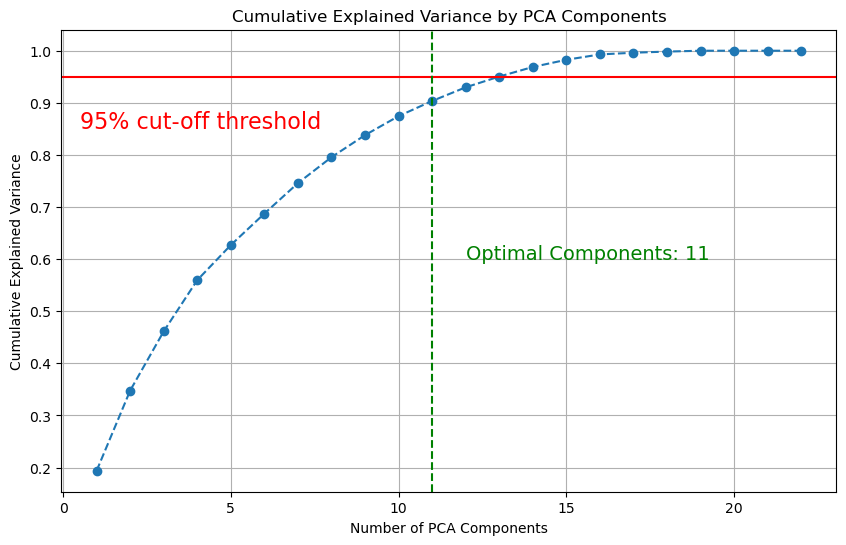

11

In [16]:
# Step 3: Determining the Optimal Number of PCA Components
# Fit PCA to the data without reducing dimensions and compute the explained variance ratio

pca_full = PCA()
pca_full.fit(scaled_features)

# Calculate the cumulative explained variance ratio
explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Plot the cumulative explained variance ratio to find the optimal number of components
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='-')  # 95% variance line for reference
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

# Determine the number of components that explain at least 95% of the variance
optimal_num_components = len(cumulative_explained_variance[cumulative_explained_variance >= 0.95]) + 1

# Highlight the optimal number of components on the plot
plt.axvline(x=optimal_num_components, color='g', linestyle='--')
plt.text(optimal_num_components + 1, 0.6, f'Optimal Components: {optimal_num_components}', color = 'green', fontsize=14)

plt.show()

# Returning the optimal number of components
optimal_num_components

In [24]:
# Step 4: Applying PCA with Optimal Components

# Creating a 2D plot for the first two PCA components
plt.figure(figsize=(10, 8))
plt.scatter(pca_full[:, 0], pca_full[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Results')
plt.grid(True)
plt.show()

TypeError: 'PCA' object is not subscriptable

<Figure size 1000x800 with 0 Axes>

In [25]:
# Step 5: KMeans Clustering — Elbow Method for Optimal Clusters

# Determining the optimal number of clusters using the Elbow Method
# We try different numbers of clusters and measure the within-cluster sum of squares (WCSS)
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(pca_full).reshape(1,-1)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 15), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Determining Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

TypeError: float() argument must be a string or a real number, not 'PCA'

In [ ]:
# Plotting
plt.figure(figsize=(10, 8))

# Scatter plot of the data points, colored by their cluster label
for i in range(n_clusters):
    # Select only data points with the cluster label equal to 'i'
    ds = pca_result[cluster_labels == i]
    # Plot these data points
    plt.scatter(ds[:, 0], ds[:, 1], label=f'Cluster {i+1}')

# Marking the cluster centers
centers = kmeans_pca.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], s=300, c='black', label='Centers', marker='*')

plt.title('KMeans Clusters Visualization')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.legend()
plt.show()

Step 6: Analyzing PCA Loadings: Interpret the PCA components to understand which nutritional factors are most significant.

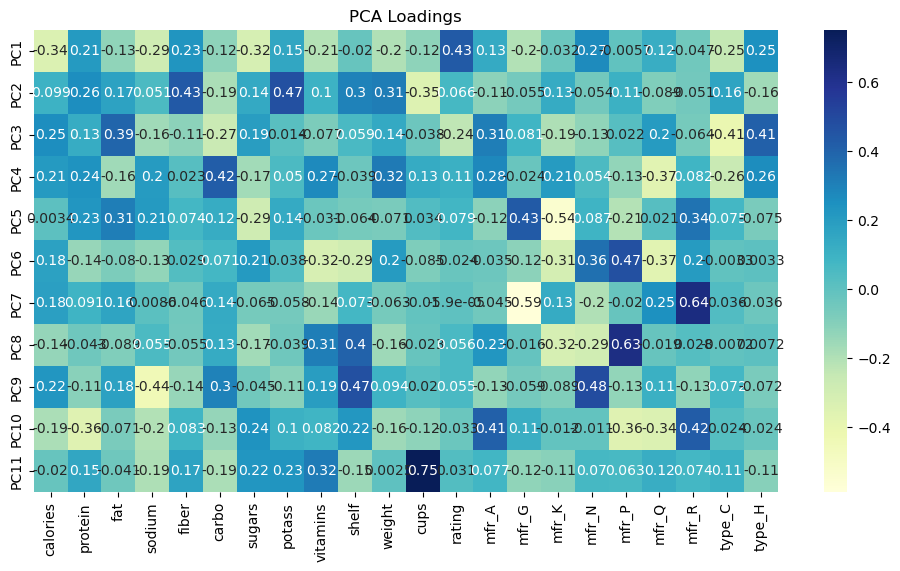

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the CSV file
file_path = 'https://raw.githubusercontent.com/fenago/datasets/main/cereal.csv'
cereal_df = pd.read_csv(file_path)

# Display the columns of the dataframe
cereal_columns = cereal_df.columns.tolist()

# Checking for missing values in the dataset
missing_values = cereal_df.isnull().sum()

# Identifying categorical columns for encoding
categorical_columns = cereal_df.select_dtypes(include=['object']).columns.tolist()

# Removing the 'name' column
cereal_df_cleaned = cereal_df.drop(['name'], axis=1)

# Applying one-hot encoding to 'mfr' and 'type'
cereal_df_encoded = pd.get_dummies(cereal_df_cleaned, columns=['mfr', 'type'])

# Scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(cereal_df_encoded)

# Fit PCA to the data without reducing dimensions
pca_full = PCA()
pca_full.fit(scaled_features)

# Number of optimal principal components
optimal_num_components = 11

# Applying PCA with the optimal number of components
pca = PCA(n_components=optimal_num_components)
pca_result = pca.fit_transform(scaled_features)

# Get the PCA components (loadings)
pca_components = pca.components_

# Create a DataFrame for better visualization and analysis
pca_loadings_df = pd.DataFrame(pca_components, columns=cereal_df_encoded.columns, index=[f'PC{i+1}' for i in range(optimal_num_components)])

# Display the loadings
pca_loadings_df

# Heatmap of the loadings
plt.figure(figsize=(12, 6))
sns.heatmap(pca_loadings_df, cmap="YlGnBu", annot=True)
plt.title('PCA Loadings')
plt.show()

In [28]:
# Inverse transform the cluster centers
original_space_centroids = scaler.inverse_transform(pca.inverse_transform(kmeans_pca.cluster_centers_))

# Create a DataFrame for the inverse transformed cluster centers
centroids_df = pd.DataFrame(original_space_centroids, columns=cereal_df_encoded.columns)

# Calculate the mean of the original data and compare
original_means = cereal_df_encoded.mean(axis=0)
centroids_comparison_df = centroids_df.copy()
centroids_comparison_df.loc['Mean'] = original_means

NameError: name 'kmeans_pca' is not defined

In [29]:
# Calculate the mean of the original data
original_means = cereal_df_encoded.mean(axis=0)

# Append the mean to the centroids for comparison
centroids_comparison_df = centroids_df.copy()
centroids_comparison_df.loc['Mean'] = original_means

# Display the comparison
print(centroids_comparison_df)

# Visualization
import matplotlib.pyplot as plt

# Visualizing the comparison
centroids_comparison_df.plot(kind='bar', figsize=(15, 6))
plt.title('Comparison of Cluster Centroids with the Dataset Mean')
plt.xlabel('Cluster / Mean')
plt.ylabel('Feature Values')
plt.show()

NameError: name 'centroids_df' is not defined

In [30]:
# Deep Dive into PCA Loadings — Step 9
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

# Reload the cereal dataset
file_path = 'https://raw.githubusercontent.com/fenago/datasets/main/cereal.csv'
cereal_df = pd.read_csv(file_path)

# Preprocess the dataset
cereal_df_encoded = pd.get_dummies(cereal_df.drop(['name'], axis=1), columns=['mfr', 'type'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(cereal_df_encoded)

# Fit PCA with the optimal number of components (11) determined earlier
pca = PCA(n_components=11)
pca.fit(scaled_features)

# Extract the absolute values of the PCA loadings
pca_loadings_analysis = pd.DataFrame(
    np.abs(pca.components_), 
    columns=cereal_df_encoded.columns, 
    index=[f'PC{i+1}' for i in range(pca.n_components)]
)

# Identify the top contributing features for each principal component
top_features_per_pc = pca_loadings_analysis.apply(lambda s: s.nlargest(5).index.tolist(), axis=1)

# Display the top contributing features for each principal component
top_features_per_pc

PC1     [rating, calories, sugars, sodium, mfr_N]
PC2          [potass, fiber, cups, weight, shelf]
PC3           [type_H, type_C, fat, mfr_A, carbo]
PC4       [carbo, mfr_Q, weight, mfr_A, vitamins]
PC5            [mfr_K, mfr_G, mfr_R, fat, sugars]
PC6        [mfr_P, mfr_Q, mfr_N, vitamins, mfr_K]
PC7        [mfr_R, mfr_G, mfr_Q, mfr_N, calories]
PC8        [mfr_P, shelf, mfr_K, vitamins, mfr_N]
PC9       [mfr_N, shelf, sodium, carbo, calories]
PC10        [mfr_R, mfr_A, protein, mfr_P, mfr_Q]
PC11     [cups, vitamins, potass, sugars, sodium]
dtype: object